In [1]:
%matplotlib widget
from circuit import *
from models import NPN, PNP, Diode, Resistor

In [5]:
circuit = Circuit()

var = Symbol("Vin", real=True)

Vcc, Gnd, Vee = 5, 0, -5
Vb = 2

V1, V2, V3 = circuit.addNodes(3)

circuit.addElements([
                        Resistor("R1", (var, V1), 1e3),
                        Diode("D1", (V1, V3), 0),

                        Diode("Dz1", (var, V2), 3),
                        Diode("Dz2", (V2, var), 0.7),
                        Resistor("R2", (V2, V3), 1e3),

                        Resistor("R3", (V3, Vb), 1e3),
                        
                    ])

circuitModel = circuit.solve(False)

In [6]:
printCircuitSolution(circuitModel, var)

-------------------------------------
D1_Cut, Dz1_Cut, Dz2_Cut
Vin ∈ Interval.open(1.30000000000000, 2.00000000000000)
{V_0: Vin, I_0: 0.0, I_1: 0.0, I_2: 0.0, V_1: 2.00000000000000, V_2: 2.00000000000000, I_3: 0.0, I_5: 0.0, I_6: 0.0, I_8: 0.0, I_9: 0.0, I_10: 0.0, I_11: 0.0, I_4: 0.0, I_7: 0.0}
-------------------------------------
-------------------------------------
D1_Cut, Dz1_Cut, Dz2_Fwd
Vin ∈ Interval(-oo, 1.30000000000000)
{V_0: Vin, I_0: 0.0, I_1: 0.0, I_2: 0.0, V_1: Vin + 0.7, V_2: 0.5*Vin + 1.35, I_3: 0.0, I_5: 0.0, I_6: 0.00065 - 0.0005*Vin, I_7: 0.0005*Vin - 0.00065, I_8: 0.0005*Vin - 0.00065, I_9: 0.00065 - 0.0005*Vin, I_10: 0.0005*Vin - 0.00065, I_11: 0.00065 - 0.0005*Vin, I_4: 0.0}
-------------------------------------
-------------------------------------
D1_Fwd, Dz1_Cut, Dz2_Cut
Vin ∈ Interval.Ropen(2.00000000000000, 8.00000000000000)
{V_0: 0.5*Vin + 1.0, V_1: 0.5*Vin + 1.0, V_2: 0.5*Vin + 1.0, I_0: 0.0005*Vin - 0.001, I_1: 0.001 - 0.0005*Vin, I_2: 0.0005*Vin - 0.00

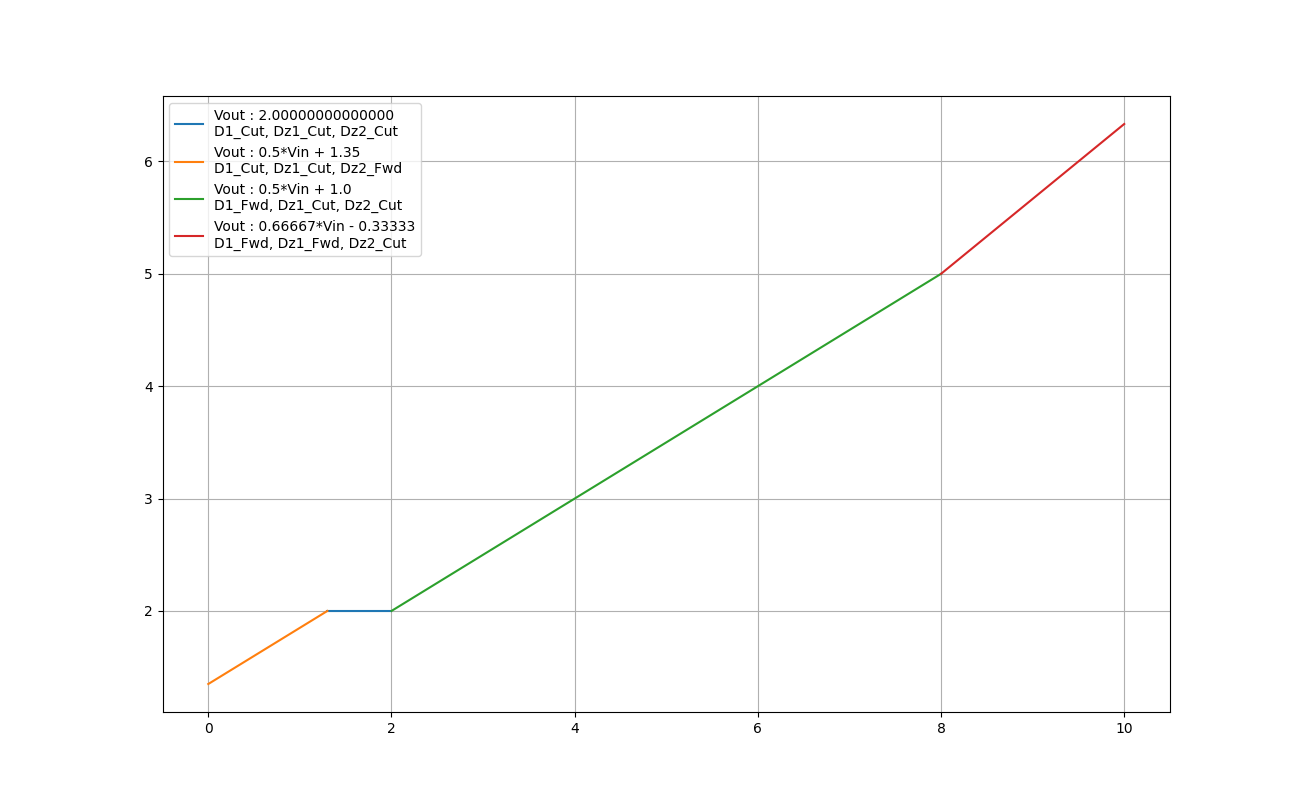

In [7]:
from sympy import diff

measurments =   [   
                    (lambda sol : sol[V3()], "Vout"),
                ]
            
fig, ax = plt.subplots(figsize=[13, 8])
plotMeasurments(circuitModel, 0, 10, 0.1, measurments, var)
plt.legend(loc="best");
plt.grid(True);
